<a href="https://colab.research.google.com/github/HwangHanJae/datascience-learningnote-pima_indians_diabetes/blob/main/pima_indians_transcription.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###[부스트코스 - 프로젝트로 배우는 데이터 사이언스](https://www.boostcourse.org/ds214)

###필요한 라이브러리 로드

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats

In [2]:
import warnings
warnings.filterwarnings('ignore')

####시각화를 선명하게 해주기 위한 설정

In [3]:
plt.style.use('ggplot')
set_matplotlib_formats('svg')

###EDA - Exploratory Data Analysis
- 탐색적 데이터 분석

####데이터 구성
- Pregnancies : 임신횟수
- Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
- BloodPressure : 이완기 혈압(mm Hg)
- SkinThickness : 피부 주름 두께(mm)
- Insulin : 2시간 혈청 인슐린(mu U / ml)
- BMI : 체질량 지수(체중kg / 키(m)^2)
- DiabetesPedigreeFunction : 당뇨병 혈통 기능
- Age : 나이
- Outcome : 당뇨가 아니다(0), 당뇨이다(1) 결과 값

####데이터셋 로드

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataScience/Data/pima_indians_diabetes.csv')
df.shape

(768, 9)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#결측치 보기
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
#수치데이터에 대한 요약
df.describe()

#Glucose, BloodPressure, SkinThickness, Insulin, BMI 값이 0이 나올 수 없기 때문에 결측치라고 볼 수 있음

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
feature_columns = df.columns[0:-1].tolist()
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

####결측치 시각화


Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

Glucose          0.006510
BloodPressure    0.045573
SkinThickness    0.295573
Insulin          0.486979
BMI              0.014323
dtype: float64


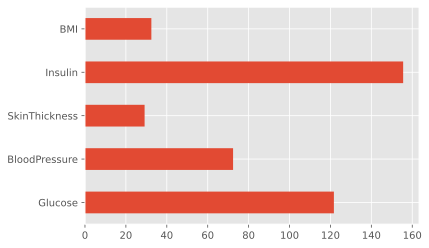

In [10]:
#결측치 시각화
cols = feature_columns[1:-2]
df_null = df[cols].replace(0,np.nan)
print(df_null.isnull().sum())
print()
print(df_null.isnull().mean())
df_null.mean().plot.barh()

#Glucose, BloodPressure, SkinThickness, Insulin, BMI 의 결측치

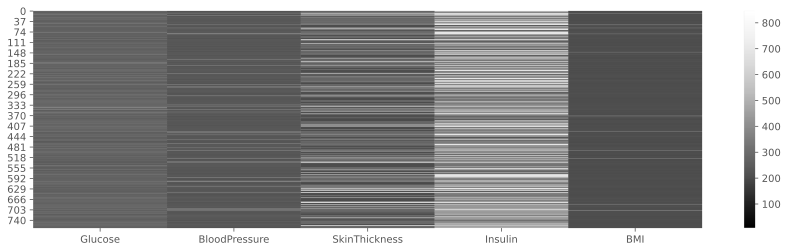

In [11]:
plt.figure(figsize=(15,4))
sns.heatmap(df_null, cmap='Greys_r')

####정답값
- target, label 이라고 부르기도 함

In [12]:
#정답값인 Outcome의 갯수를 보기
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [13]:
#정답값인 Outcome의 비율 보기
df['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [14]:
#다른 변수(임신횟수)와 함께 비교
#groupby는 index의 올값, value에 올값, 계산 방법
df_po = df.groupby(['Pregnancies'])['Outcome'].agg(['mean','count']).reset_index()
df_po

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


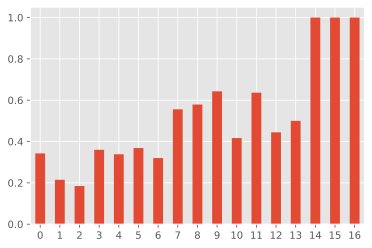

In [15]:
#임신횟수에 따른 당뇨병 발병 비율
df_po['mean'].plot.bar(rot=0)

###시각화

####countplot

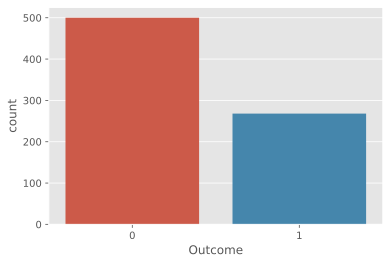

In [16]:
#위에서 구했던 당뇨병 발병 비율을 구하기
#당뇨병 발병 빈도수 비교
sns.countplot(data=df, x='Outcome')

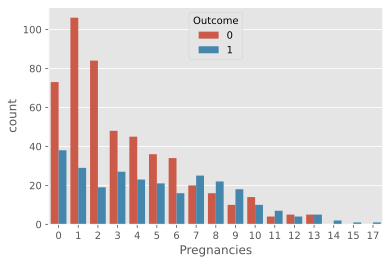

In [17]:
#임신횟수에 따른 당뇨병 발병 빈도수를 비교
sns.countplot(data=df, x='Pregnancies', hue='Outcome')

In [18]:
#임신횟수의 많고 적음에 따라 Pregnancies_high 변수를 만들기
df['Pregnancies_high']  = df['Pregnancies'] > 6
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
0,6,148,72,35,0,33.6,0.627,50,1,False
1,1,85,66,29,0,26.6,0.351,31,0,False
2,8,183,64,0,0,23.3,0.672,32,1,True
3,1,89,66,23,94,28.1,0.167,21,0,False
4,0,137,40,35,168,43.1,2.288,33,1,False


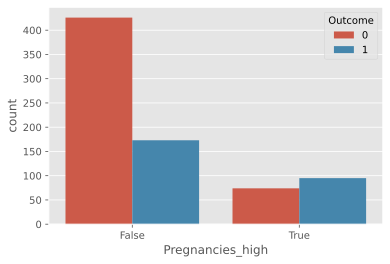

In [19]:
#Pregnancies_high 변수의 빈도수를 countplot으로 그림
#hue = 'Outcome'으로 다른 색상
sns.countplot(data=df, x='Pregnancies_high', hue='Outcome')

####barplot
- 기본 설정으로 시각화면 y축에 평균을 추정해서 그림

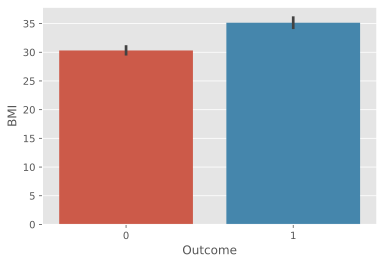

In [20]:
#당뇨병 발병에 따른 BMI 수치를 비교
sns.barplot(data=df, x='Outcome', y='BMI')

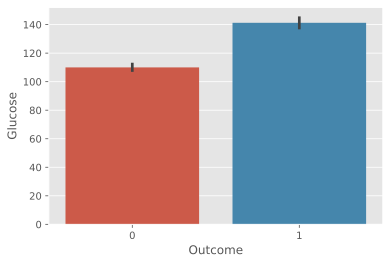

In [21]:
#당뇨병 발병에 따른 포도당(Glucose)수치를 비교
sns.barplot(data=df, x='Outcome', y='Glucose')

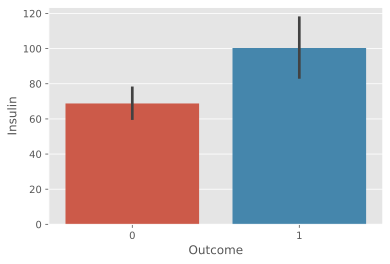

In [22]:
#Insulin 수치가 0이상인 관측치에 대해서 당뇨병 발병을 비교
sns.barplot(data=df, x='Outcome', y='Insulin')

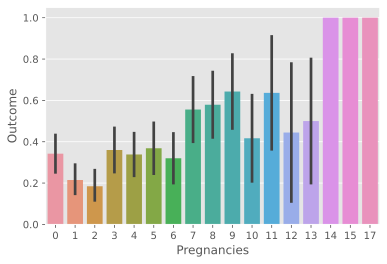

In [23]:
#임신횟수에 대해서 당뇨병 발병 비율을 비교
sns.barplot(data=df, x='Pregnancies', y='Outcome')

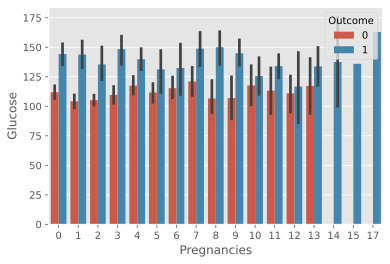

In [24]:
#임신횟수에 따른 포도당 수치를 당뇨병 발병여부에 따라 시각화
sns.barplot(data=df, x='Pregnancies', y='Glucose',hue='Outcome')

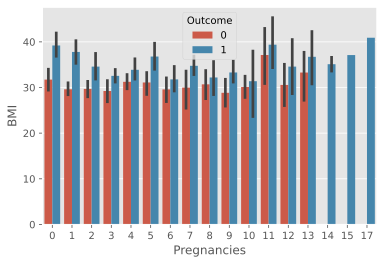

In [25]:
#임신횟수에 따른 체질량지수를 당뇨병 발병여부에 따라 시각화
sns.barplot(data=df, x='Pregnancies', y='BMI',hue='Outcome')

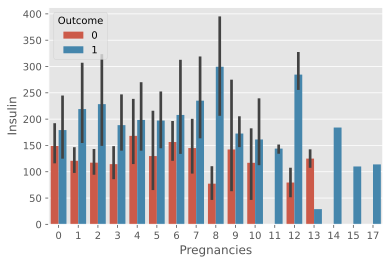

In [26]:
#임신횟수에 따른 인슐린 수치를 당뇨병 발병여부에 따라 시각화
#인슐린 수치에는 결측치(0)가 많기 때문에 0보다 큰 값에 대해서만 그림
sns.barplot(data=df[df['Insulin'] > 0],x='Pregnancies',y="Insulin",hue='Outcome')

####boxplot

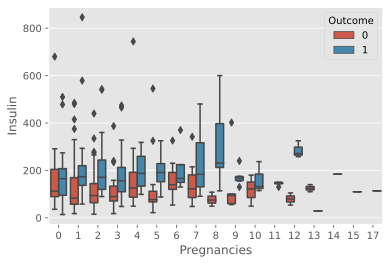

In [27]:
#임신횟수에 따른 인슐린수치를 당뇨병 발병 여부에 따라 시각화
#인슐린 수치에는 결측치가 많기 때문에 0보다 큰 값에 대해서만 그림
sns.boxplot(data=df[df['Insulin'] > 0], x='Pregnancies', y='Insulin',hue='Outcome')

####violinplot

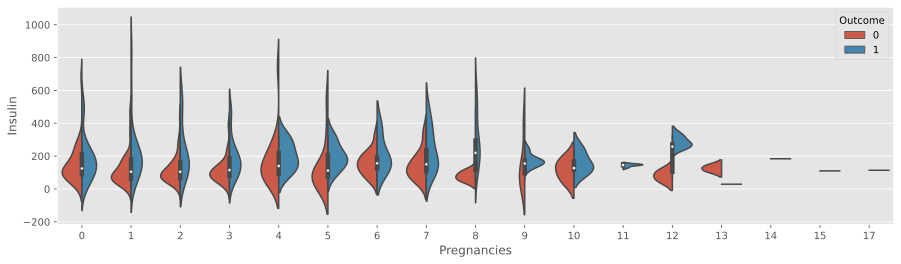

In [28]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df[df['Insulin'] > 0], x='Pregnancies', y='Insulin',hue='Outcome',split=True)

####swarmplot

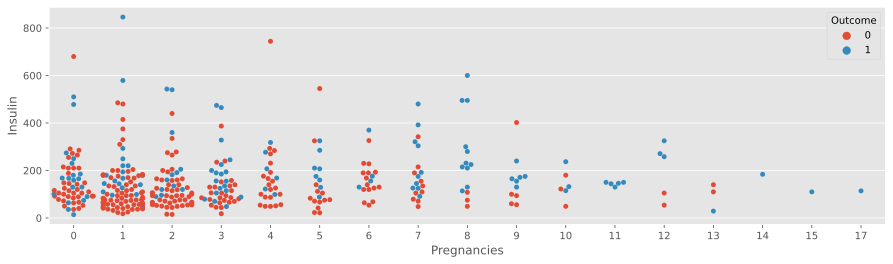

In [29]:
plt.figure(figsize=(15,4))
sns.swarmplot(data=df[df['Insulin'] > 0], x='Pregnancies', y='Insulin',hue='Outcome')

####distplot

In [30]:
df_0 = df[df['Outcome'] == 0]
df_1 = df[df['Outcome'] == 1]

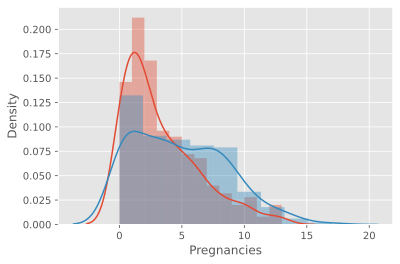

In [31]:
#임신횟수에 따른 당뇨병 발병 여부를 시각화
sns.distplot(df_0['Pregnancies'])
sns.distplot(df_1['Pregnancies'])

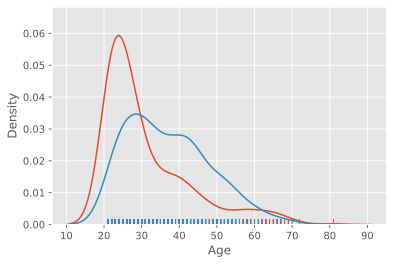

In [32]:
#나이에 따른 당뇨병 발병 여부를 시각화
sns.distplot(df_0['Age'], hist=False, rug=True, label="0")
sns.distplot(df_1['Age'], hist=False, rug=True, label="1")

####Subplots

#####Pandas를 통항 histplot 그리기
- pandas를 사용하면 모든 변수에 대한 서브플롯을 한 번에 그려줍니다.

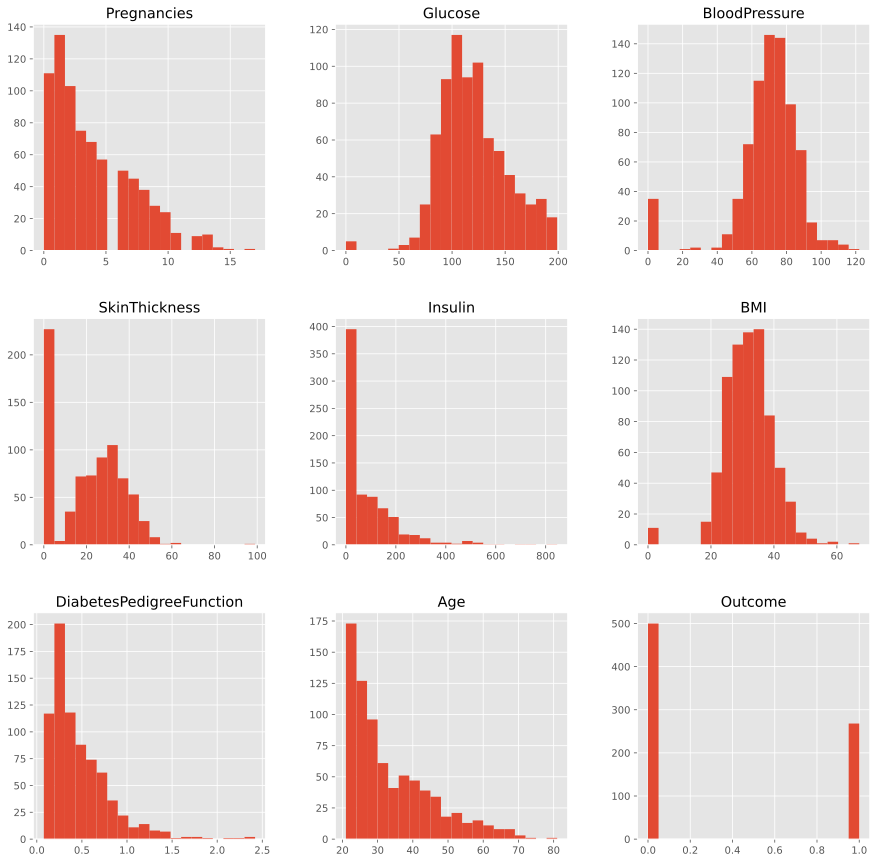

In [33]:
h = df[df.columns[:-1]].hist(figsize=(15,15), bins=20)

#####반복문을 통한 서브플롯 그리기

distplot

In [34]:
#컬럼의 수만큼 for문을 만들어서 서브플롯으로 시각화
col_s = df.columns[:-1].tolist()
col_s

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

0 Pregnancies 0 0
1 Glucose 0 1
2 BloodPressure 0 2
3 SkinThickness 1 0
4 Insulin 1 1
5 BMI 1 2
6 DiabetesPedigreeFunction 2 0
7 Age 2 1
8 Outcome 2 2


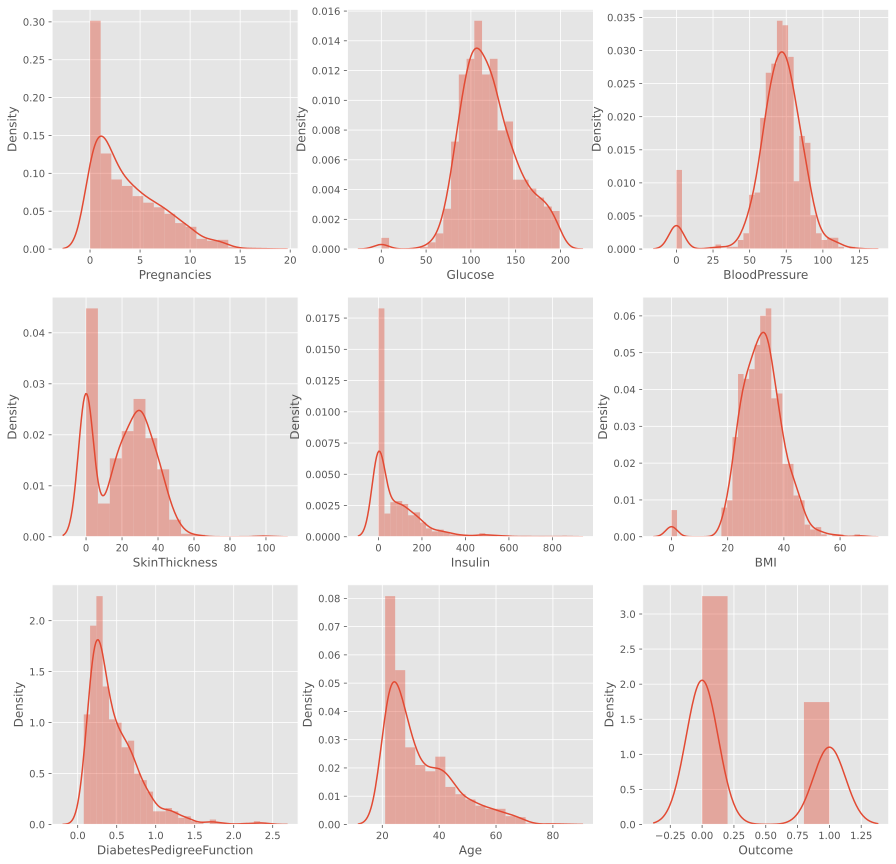

In [35]:
#distplot으로 서브플롯 그리기
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(15,15))
for i, col_name in enumerate(col_s):
  row = i // 3
  col = i % 3
  print(i, col_name, row,col)
  sns.distplot(df[col_name], ax=axes[row][col])

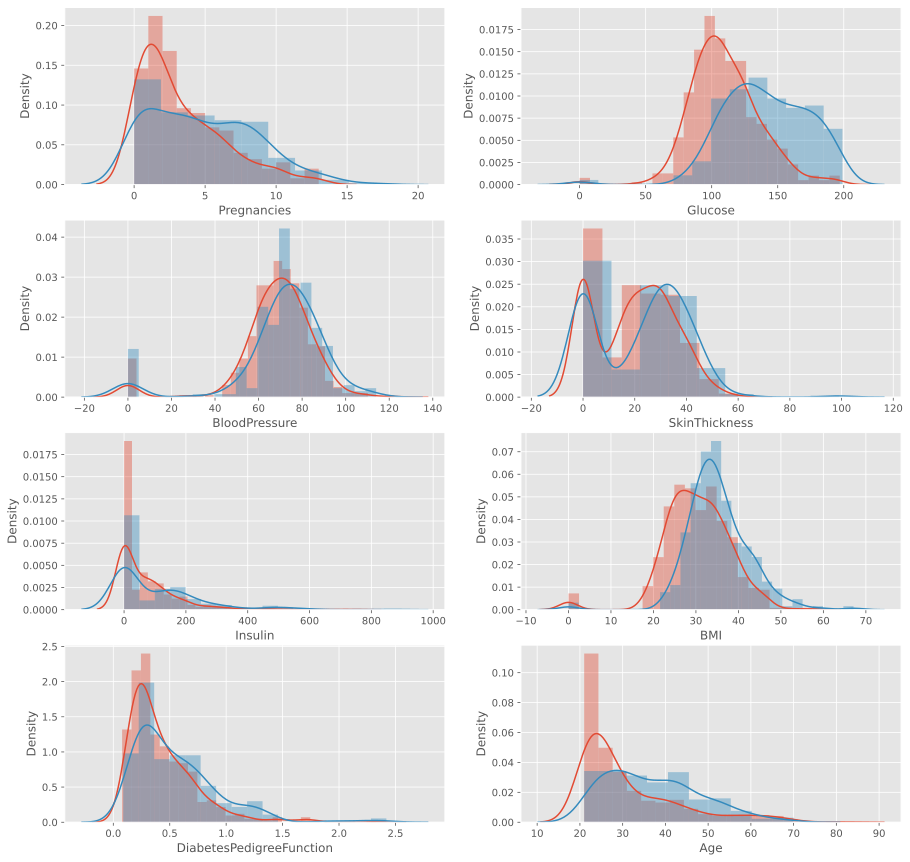

In [36]:
fig, axes = plt.subplots(nrows=4, ncols=2,figsize=(15,15))
for i, col_name in enumerate(col_s[:-1]):
  row = i // 2
  col = i % 2
  sns.distplot(df_0[col_name], ax=axes[row][col])
  sns.distplot(df_1[col_name], ax=axes[row][col])

violinplot

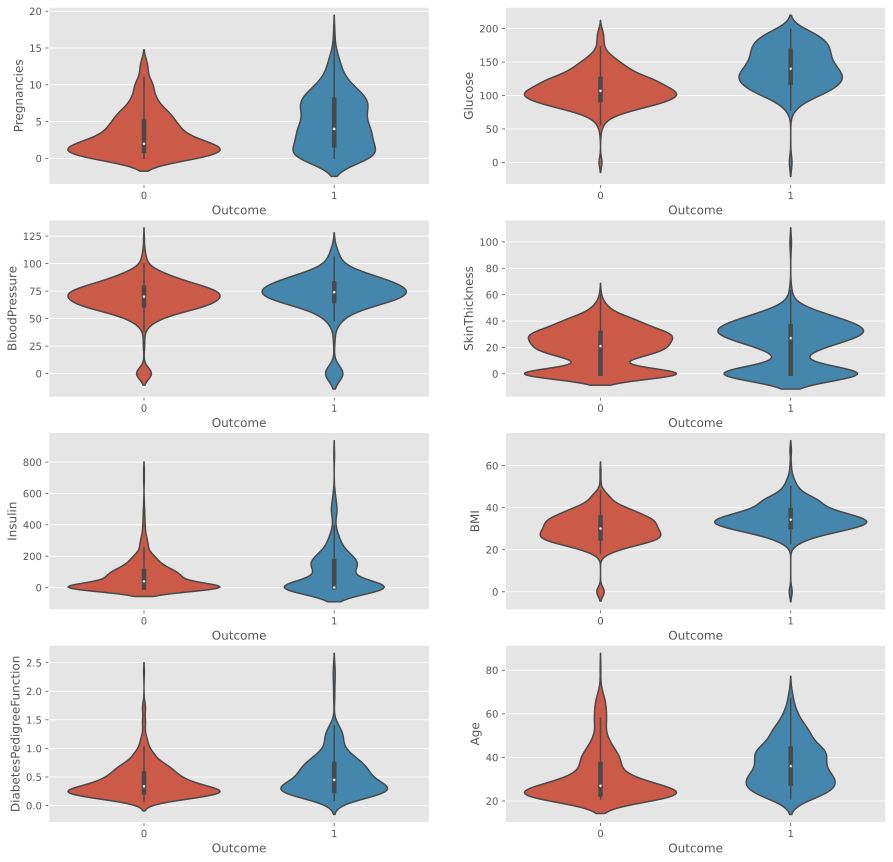

In [37]:
#violinplot으로 서브플롯 그리기
fig, axes = plt.subplots(nrows=4, ncols=2,figsize=(15,15))
for i, col_name in enumerate(col_s[:-1]):
  row = i // 2
  col = i % 2
  sns.violinplot(data=df, x="Outcome", y=col_name,ax=axes[row][col])

lmplot
- 상관계수가 높은 두 변수에 대해 시각화

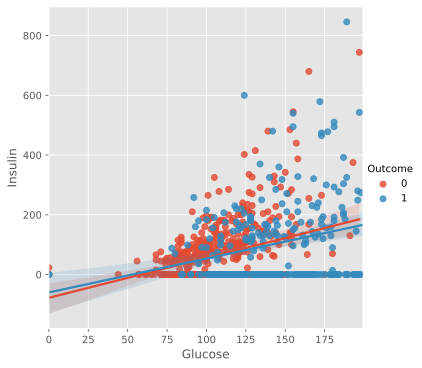

In [38]:
#Glucose 와 Insulin을 Outcome으로 구분
sns.lmplot(data=df, x='Glucose', y='Insulin', hue='Outcome')

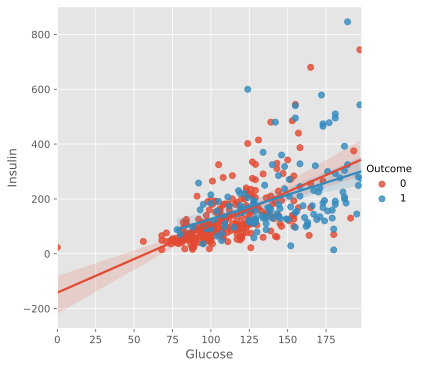

In [39]:
#Glucose 와 Insulin을 Outcome으로 구분
#Insulin > 0
sns.lmplot(data=df[df['Insulin'] > 0], x='Glucose', y='Insulin', hue='Outcome')

pairplot

In [40]:
#PairGird를 통해 모든 변수에 대해 Outcome에 따른 scatterplot을 그림
#g = sns.PairGrid(df, hue='Outcome')
#g.map(plt.scatter)

###상관분석

In [41]:
#정갑 값인 Outcome을 제외하고 feature로 사용할 컬럼들에 대해 0을 결측치로 만들기


df_matrix = df.iloc[:,:-2].replace(0, np.nan)
df_matrix['Outcome'] = df['Outcome']
df_matrix.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [42]:
#상관계수를 구하기
df_corr = df_matrix.corr()
df_corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.166329,0.285013,0.167298,0.104081,0.128207,-0.006459,0.550525,0.268218
Glucose,0.166329,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.285013,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.167298,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.104081,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.128207,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.006459,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.550525,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.268218,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


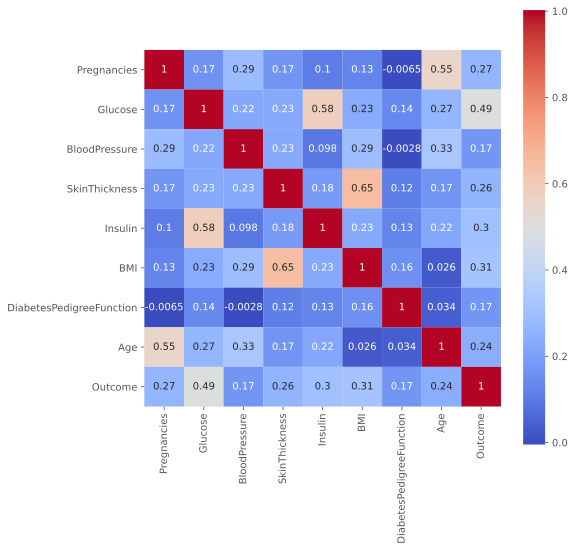

In [43]:
#위에서 구한 상관계수를 heatmap으로 시각화
plt.figure(figsize=(8,8))
sns.heatmap(df_corr, annot=True, square=True, cmap='coolwarm')

In [44]:
#Outcom 수치에 대한 상관계수만 모아서 보기
df_corr['Outcome'].sort_values(ascending = False)

Outcome                     1.000000
Glucose                     0.494650
BMI                         0.313680
Insulin                     0.303454
Pregnancies                 0.268218
SkinThickness               0.259491
Age                         0.238356
DiabetesPedigreeFunction    0.173844
BloodPressure               0.170589
Name: Outcome, dtype: float64

####상관계수가 높은 변수끼리 보기

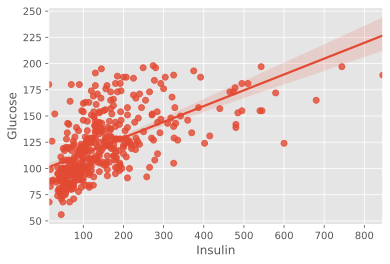

In [45]:
#df_matrix으로 결측치 처리한 데이터 프레임으로
#Insulin과 Glucose로 그리기
sns.regplot(data=df_matrix, x='Insulin',y='Glucose')

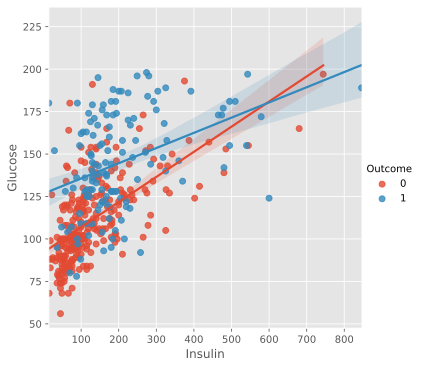

In [46]:
#df_matrix으로 결측치 처리한 데이터 프레임으로
#Insulin과 Glucose로 그리기
sns.lmplot(data=df_matrix, x='Insulin',y='Glucose',hue="Outcome")

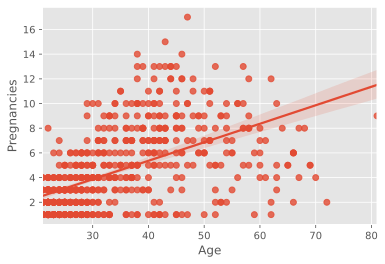

In [47]:
sns.regplot(data=df_matrix, x='Age',y='Pregnancies')

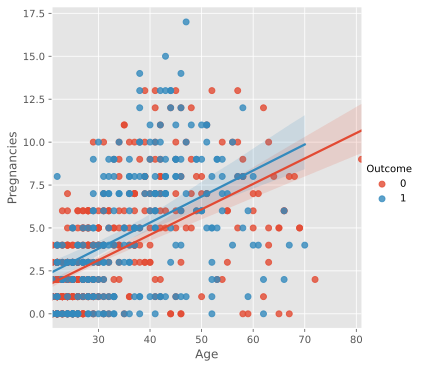

In [48]:
#Age와 Pregnancies로 lmplot을 그리고 Outcome에 따라 다른 색상 표현
sns.lmplot(data=df, x="Age", y='Pregnancies', hue='Outcome')

###Feature Engineering

In [49]:
#데이터 불러오기
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataScience/Data/pima_indians_diabetes.csv")

In [50]:
#수치형 변수를 범주형 변수로 만들기
df["Pregnancies_high"] = df["Pregnancies"] > 6
df[["Pregnancies", "Pregnancies_high"]].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


In [51]:
#수치형 변수를 범주형 변수로 만들기
#One-Hot-Encoding
#수치 -> 범주 -> 수치
df["Age_low"] =  df["Age"] < 25
df["Age_middle"] = (df["Age"] >= 25) & (df["Age"] <= 60)
df["Age_high"] = df["Age"] > 60
df[["Age", "Age_low","Age_middle","Age_high"]].head()

,Age,Age_low,Age_middle,Age_high
0,50,False,True,False
1,31,False,True,False
2,32,False,True,False
3,21,True,False,False
4,33,False,True,False


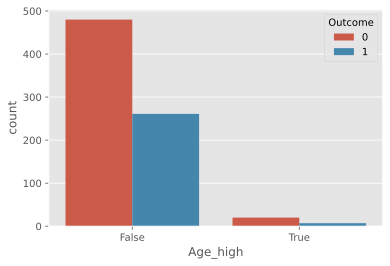

In [52]:
sns.countplot(data=df, x="Age_high", hue="Outcome")

####결측치 다루기

In [53]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [54]:
#Insulin
df['Insulin_nan'] = df['Insulin'].replace(0, np.nan)

In [55]:
df['Insulin_nan'].isnull().sum()

374

In [56]:
df.groupby(['Outcome'])['Insulin', 'Insulin_nan'].agg(['mean','median'])

Insulin        Insulin_nan       
               mean median        mean median
Outcome                                      
0         68.792000     39  130.287879  102.5
1        100.335821      0  206.846154  169.5

In [57]:
#nan값이 들어가 있으면 인공지능이 처리할 수 없음
#값을 바꾸어 주어야 함
#결측치 채우기

df.loc[(df['Outcome'] == 0) & (df['Insulin_nan'].isnull()), "Insulin_nan"] = 102.5
df.loc[(df['Outcome'] == 1) & (df['Insulin_nan'].isnull()), "Insulin_nan"] = 169.5

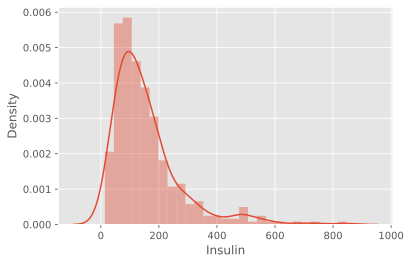

In [58]:
#결측치를 채우기전에 Insulin값은 왜도(한쪽으로 치우침), 첨도(뾰족함)
sns.distplot(df.loc[df['Insulin'] > 0, "Insulin"])

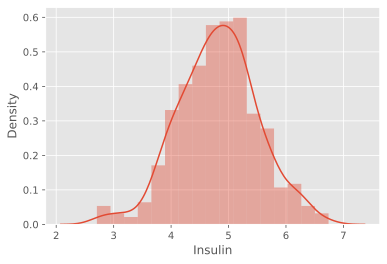

In [59]:
#로그를 취하면 정규분포를 띄움
#정규분포를 띄우면 인공지능이 조금더 좋은 성능을 가짐
sns.distplot(np.log(df.loc[df['Insulin'] > 0, "Insulin"] + 1))

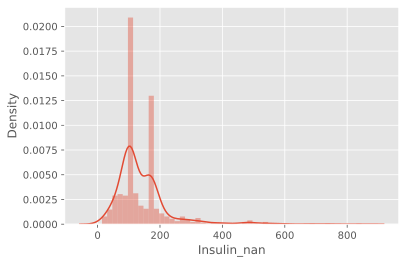

In [60]:
#결측치를 중앙값으로 채운 Insulin_nan 값을 그래프로 시각화
sns.distplot(df["Insulin_nan"])

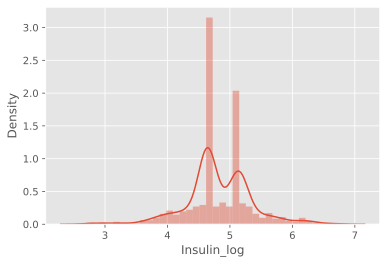

In [61]:
#결측치를 중앙값으로 채운 Insulin_nan 값에 로그를 취하고 그래프로 시각화
df["Insulin_log"] = np.log(df["Insulin_nan"] + 1)
sns.distplot(df["Insulin_log"])

####상관분석을 통해 파생변수 만들기

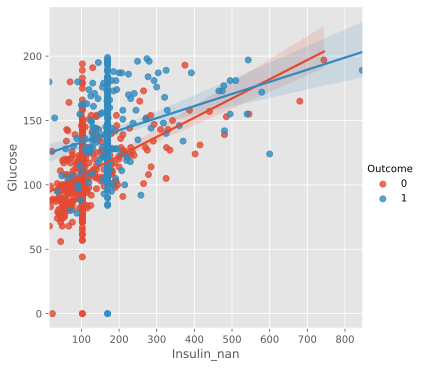

In [62]:
sns.lmplot(data=df, x="Insulin_nan", y="Glucose", hue='Outcome')

In [63]:
#Glucose 수치가 100보다 작고, Insulin 수치가 102.5보다 작은 값을 컬럼으로 만듬
df["low_glu_insulin"] = (df["Glucose"] < 100) & (df["Insulin_nan"] <= 102.5)

In [64]:
#Glucose 수치가 100보다 작고, Insulin 수치가 102.5보다 작은 값
#위의 값은 Outcome이 1인경우가 5개, 즉 발병률이 적다
pd.crosstab(df["Outcome"],df["low_glu_insulin"])

low_glu_insulin,False,True
Outcome,,
0,332,168
1,263,5


####이상치(outlier) 다루기

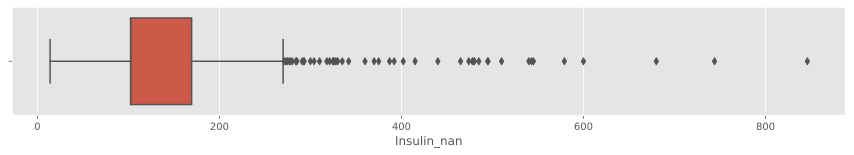

In [65]:
plt.figure(figsize=(15,2))
sns.boxplot(df["Insulin_nan"])

In [66]:
df["Insulin_nan"].describe()

count    768.000000
mean     141.753906
std       89.100847
min       14.000000
25%      102.500000
50%      102.500000
75%      169.500000
max      846.000000
Name: Insulin_nan, dtype: float64

In [67]:
#이상치를 찾는 공식 -1
#3사분위수  - 1사분위수 = IQR
#IQR값 구하기
IQR3 = df["Insulin_nan"].quantile(0.75)
IQR1 = df["Insulin_nan"].quantile(0.25)
IQR = IQR3 - IQR1
IQR

67.0

In [68]:
#이상치를 찾는 공식 -2
#3사분위 + (IQR *1.5) = 이상치
OUT = IQR3 + (IQR * 1.5)
OUT

270.0

In [69]:
df[df["Insulin_nan"] > 600].shape

(3, 16)

####스케일링(Scaling)
- StandardScaler

In [70]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


In [71]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(df[['Glucose','DiabetesPedigreeFunction']])
#scale = scaler.transform(df[['Glucose','DiabetesPedigreeFunction']])
#scale

In [72]:
#df[['Glucose','DiabetesPedigreeFunction']] = scale

In [73]:
#df[['Glucose','DiabetesPedigreeFunction']].hist()

####CSV파일로 저장하기

In [74]:
#구글 드라이브로 저장
#df.to_csv("diabetes_feature.csv", index=False)
#df.to_csv("/content/drive/MyDrive/Colab Notebooks/DataScience/My CSV/diabetes_feature.csv", index=False)

###머신러닝을 위한 데이터

In [75]:
#위에서 저장한 feature engineering한 데이터 로드
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataScience/My CSV/diabetes_feature.csv")
df.shape

(768, 16)

In [76]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


####학습, 예측 데이터셋 나누기
- 가장 마지막에 있는 Outcome은 label값이기 때문에 제외

In [77]:
# #8:2의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 split_count 라는 변수에 담기
# #split_count
# split_count = int(df.shape[0] * 0.8)
# split_count

In [78]:
# #train, test로 슬라이싱을 통해 데이터를 나눔
# train = df[:split_count].copy()
# train = train[train['Insulin_nan'] < 600]
# test = df[split_count:].copy()
# print(train.shape)
# test.shape

####학습, 예측에 사용할 컬럼

In [79]:
# #feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.
# #사용하지 않을 column(Pregnancies, Outcome, Age_low, Age_middle ,Age_high, Insulin)을 제거합니다.
# feature_names = train.columns.tolist()
# feature_names.remove("Pregnancies")
# feature_names.remove("Outcome")
# feature_names.remove("Age_low")
# feature_names.remove("Age_middle")
# feature_names.remove("Age_high")
# feature_names.remove("Insulin")
# feature_names.remove("Insulin_log")
# feature_names

####정답값이자 예측해야 될 값

In [80]:
# #label_name 이라는 변수에 예측할 컬럼의 이름을 담기
# label_name = "Outcome"
# label_name

####학습, 예측 데이터셋 만들기

In [81]:
# #학습 세트 만들기 ex) 시험의 기출문제
# X_train = train[feature_names]
# print(X_train.shape)
# X_train.head()

In [82]:
# #정답 값 만들기 ex) 기출문제의 정답
# y_train = train[label_name]
# print(y_train.shape)

In [83]:
# #예측에 사용할 데이터세트를 만들기 ex)실전 시험 문제
# X_test = test[feature_names]
# print(X_test.shape)
# X_test.head()

In [84]:
#예측의 정답값 ex) 실전 시험 문제의 정답
# y_test = test[label_name]
# print(y_test.shape)

####학습, 예측할 데이터 만들기(train_test_split)

In [100]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
      'Insulin_nan','low_glu_insulin']]
X.shape

(768, 9)

In [101]:
y = df['Outcome']
y.shape

(768,)

In [102]:
#위에서 train, test로 나누었던 작업들을 라이브러리로 처리할 수 있음
#사이킷런에서 제공하는 model_selection의 train_test_split으로 만들기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [103]:
#train 세트의 문제와 정답의 데이터 수를 확인
X_train.shape, y_train.shape

((614, 9), (614,))

In [104]:
#test 세트의 문제와 정답의 데이터 수를 확인
X_test.shape, y_test.shape

((154, 9), (154,))

In [106]:
feature_names = X.columns

###머신러닝

####머신러닝 알고리즘 가져오기 - 학습과 예측

#####DecisionTree

In [90]:
#DecisionTreeClassifier 불러오기
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state =42)
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

#####RandomForest

In [117]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)

In [118]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [119]:
y_pred = model.predict(X_test)

In [120]:
(y_test != y_pred).sum()

20

In [123]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8701298701298701

In [121]:
model.score(X_test, y_test)

0.8701298701298701

In [124]:
model.feature_importances_

array([0.14724421, 0.04737896, 0.07125703, 0.0915895 , 0.0647634 ,
       0.10255183, 0.01102453, 0.43133793, 0.03285262])

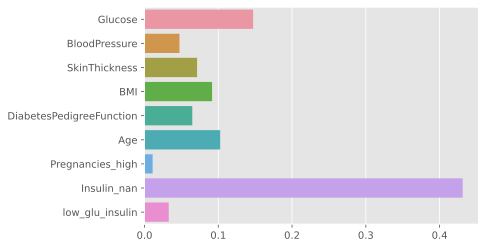

In [125]:
sns.barplot(x=model.feature_importances_, y=feature_names)

#####Boosting

In [138]:
#Boosting
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=42)
model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [139]:
model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [140]:
model.feature_importances_

array([1.06409948e-01, 7.04053663e-03, 6.57236021e-02, 3.73742490e-02,
       2.62954875e-02, 9.47259928e-02, 1.56708089e-04, 6.62273475e-01,
       0.00000000e+00])

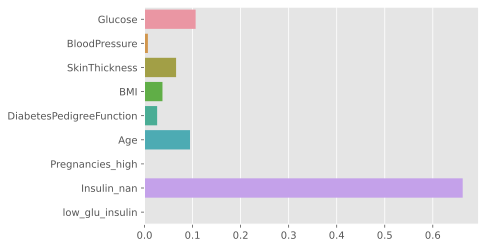

In [141]:
sns.barplot(x=model.feature_importances_, y=feature_names)

In [142]:
y_pred= model.predict(X_test)

In [143]:
(y_test != y_pred).sum()

24

In [144]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8441558441558441

In [145]:
model.score(X_test, y_test)

0.8441558441558441

####모델의 성능 높이기
- GridSearchCV
- RandomSearchCV

In [91]:
# #for문(반복문)을 사용하여 max_depth 파라미터를 찾기
# for max_depth in range(3, 12):
#   model = DecisionTreeClassifier(random_state =42, max_depth=max_depth)
#   y_pred = model.fit(X = X_train, y = y_train).predict(X=X_test)
#   score = accuracy_score(y_true=y_test, y_pred= y_pred) * 100
#   print(max_depth, score)

#파라미터의 수가 많고, 좋은 방법이 아님

#####GridSearchCV

In [92]:
#GridSearchCV사용
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier(random_state=42)
param_grid = {'max_depth' : range(3,12),
              'max_features' : [0.3, 0.5, 0.7, 0.9, 1]}
clf = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1,cv=5,verbose=1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    2.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_

In [93]:
#가장 좋은 파라미터 출력
clf.best_params_

{'max_depth': 5, 'max_features': 0.7}

In [94]:
#가장 좋은 모델 출력
clf.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=0.7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [95]:
#가장 좋은 점수 출력
clf.best_score_

0.8664934026389444

In [96]:

pd.DataFrame(clf.cv_results_).sort_values('rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.003970,0.000137,0.005771,0.007754,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",0.878049,0.910569,0.813008,0.837398,0.893443,0.866493,0.036082,1
7,0.003785,0.000028,0.001371,0.000015,4,0.7,"{'max_depth': 4, 'max_features': 0.7}",0.813008,0.886179,0.829268,0.861789,0.918033,0.861655,0.037935,2
8,0.004096,0.000053,0.001354,0.000022,4,0.9,"{'max_depth': 4, 'max_features': 0.9}",0.821138,0.886179,0.853659,0.853659,0.893443,0.861615,0.026005,3


In [97]:
clf.score(X_test, y_test)

0.8701298701298701

In [98]:
clf.best_estimator_.feature_importances_

array([0.07026002, 0.02206104, 0.10775281, 0.01849065, 0.03473751,
       0.1218514 , 0.        , 0.62484656, 0.        ])

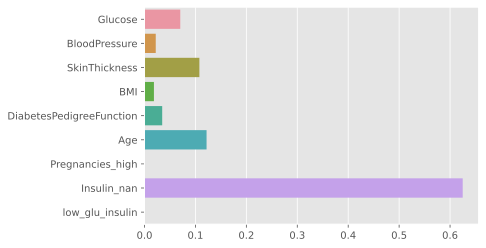

In [107]:
sns.barplot(x=clf.best_estimator_.feature_importances_, y=feature_names)

#####RandomSearchCV

In [108]:
max_depth = np.random.randint(9, 20, 10)
max_features = np.random.uniform(0.7, 1.0, 100)

In [109]:
#RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_distributions = {"max_depth" : max_depth,
                       "max_features" : max_features,
                       "min_samples_split" : range(4, 7)}
rsv = RandomizedSearchCV(model,
                   param_distributions=param_distributions,
                   n_iter=10000,
                   scoring = 'accuracy',
                   n_jobs = -1,
                   cv=5,
                   random_state =42
                   )
rsv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=42,
            

In [110]:
rsv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features=0.8067901574927555,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=4, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=42, splitter='best')

In [111]:
rsv.best_params_

{'max_depth': 14, 'max_features': 0.8067901574927555, 'min_samples_split': 4}

In [112]:
rsv.best_score_

0.866506730641077

In [113]:
rsv.score(X_test, y_test)

0.8571428571428571

In [114]:
pd.DataFrame(rsv.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004920,0.000385,0.001741,0.000599,4,0.80679,14,"{'min_samples_split': 4, 'max_features': 0.806...",0.910569,0.886179,0.788618,0.845528,0.901639,0.866507,0.044877,1
1326,0.005742,0.002503,0.002169,0.001589,4,0.867401,16,"{'min_samples_split': 4, 'max_features': 0.867...",0.910569,0.886179,0.788618,0.845528,0.901639,0.866507,0.044877,1
1334,0.004686,0.000133,0.001379,0.000014,6,0.911594,16,"{'min_samples_split': 6, 'max_features': 0.911...",0.829268,0.894309,0.829268,0.878049,0.901639,0.866507,0.031349,1


In [115]:
rsv.best_estimator_.feature_importances_

array([0.11078117, 0.038729  , 0.09572523, 0.04629913, 0.03104733,
       0.09637409, 0.00834318, 0.57270087, 0.        ])

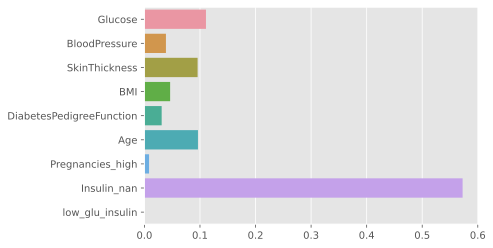

In [116]:
sns.barplot(x=rsv.best_estimator_.feature_importances_, y=feature_names)

#####RandomSearchCV - 여러개 알고리즘 사용(DT, RF, GB 알고리즘)

In [163]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

estimators = [DecisionTreeClassifier(random_state=42),
             RandomForestClassifier(random_state=42),
             GradientBoostingClassifier(random_state=42)
             ]
estimators

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=42, splitter='best'),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=42, verbose=0,
                        warm_start=False),
 GradientBoost

In [172]:
from sklearn.model_selection import RandomizedSearchCV

max_depth = np.random.randint(2, 20, 10)
max_features = np.random.uniform(0.3, 1.0, 10)

param_distributions = {"max_depth" : max_depth,
                       "max_features" : max_features,
                       }

results = []
for estimator in estimators:
  result = []
  if estimator.__class__.__name__ != "DecisionTreeClassifier":
    param_distributions['n_estimators'] = np.random.randint(100,1000,10)
    
  rs = RandomizedSearchCV(estimator, param_distributions, n_iter=10, scoring='accuracy', n_jobs=-1, cv=5, random_state=42,verbose=2)
  rs.fit(X_train, y_train)
  result.append(estimator.__class__.__name__)
  result.append(rs.best_params_)
  result.append(rs.best_score_)
  result.append(rs.score(X_test, y_test))
  result.append(rs.cv_results_)
  results.append(result)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   48.6s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   17.8s finished


In [173]:
pd.DataFrame(results, columns=['estimator', 'best_params_','train_score','test_score','cv_results'])

,estimator,best_params_,train_score,test_score,cv_results
0,DecisionTreeClassifier,"{'max_features': 0.9423251826401948, 'max_dept...",0.861615,0.876623,"{'mean_fit_time': [0.014985084533691406, 0.006..."
1,RandomForestClassifier,"{'n_estimators': 901, 'max_features': 0.970874...",0.905571,0.850649,"{'mean_fit_time': [1.0221256256103515, 1.18079..."
2,GradientBoostingClassifier,"{'n_estimators': 201, 'max_features': 0.662145...",0.900666,0.870130,"{'mean_fit_time': [1.0755209922790527, 0.88281..."


0.859962681594029

####학습(훈련)
- 시험을 볼때 기출문제(X_train)와 기출문제의 정답(y_train)을 보고 공부하는 방법과 유사

In [ ]:
#학습을 시키기
model = DecisionTreeClassifier(random_state=42)
model.fit(X = X_train, y = y_train)

####예측
- 실천 시험문제(X_train)라고 보면 됩니다. 우리가 정답을 직접 예측

In [ ]:
#예측을 하고 결과를 y_pred에 담기
y_pred = model.predict(X = X_test)
y_pred.shape

####트리 알고리즘 분석
- 의사결정나무를 시각화

In [ ]:
feature_names = X_train.columns.tolist()

from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
tree = plot_tree(decision_tree= model,
                 feature_names=feature_names,
                 filled=True,
                 fontsize=10,
                 rounded=True)

In [ ]:
# #graphviz로 그리기
# import graphviz
# from sklearn.tree import export_graphviz
# dot_tree = export_graphviz(model, feature_names=feature_names, filled=True)
# #graphviz.Source(dot_tree)

####특성 중요도(feature_importances_)출력 및 시각화

In [ ]:
#특성의 중요도를 추출하기
model.feature_importances_

In [ ]:
#특성의 중요도 시각화 하기
sns.barplot(x=model.feature_importances_, y=feature_names)

####정확도(Accuracy)측정

In [ ]:
#실제값 - 예측값을 빼주면 같은 값은 0으로 나옴
#여기에서 절대값을 씌운 값이 1인 값이 다르게 예측한 값
# 44 --> 39 --> 49 --> 23 --> 16 --> 15 --> 15
#train_test_split 사용이후
#28
diff_count = abs(y_test - y_pred).sum()
diff_count

In [ ]:
#예측의 정확도를 구함
#100점 만점 중에 몇점을 맞았는지 구하기
#71 --> 74 --> 68 --> 85 --> 89 --> 90 --> 90
#train_test_split 사용이후
#81
(len(y_test) - diff_count) / len(y_test) * 100

In [ ]:
#위에서 처럼 직접 구할 수 있지만 미리 구현항 알고리즘을 가져와 사용
from sklearn.metrics import accuracy_score

accuracy_score(y_true=y_test, y_pred= y_pred) * 100

In [ ]:
#model의 score로 점수 계산
model.score(X_test, y_test) * 100